### Imports

In [2]:
import numpy as np
from PIL import Image, ImageOps
from tqdm import tqdm
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### Definitions of helper functions

In [3]:
def get_grayscale_image_arr(path):
    im = ImageOps.grayscale(Image.open(path))
    image_array = np.array(im).astype(int)
    
    for y in range(im.size[1]):
        for x in range(1, im.size[0]):
            if image_array[y][x] != 255:
                image_array[y][x] = 0

    image_array = image_array.astype(bool).astype(int)
    return image_array

def get_color(flag):
    return 90 + 100 * (flag % 2)


### Definitions of main functions

In [4]:

def color_and_check_neighbors(arr, x, y, color):
    stack = deque()
    stack.append((x,y))
    deltas = [[-1, 0], [1, 0], [0, 1], [0, -1]]
    length, width = arr.shape
    while len(stack):
        p = stack.popleft()
        arr[p[0]][p[1]] = color
        x = p[0]
        y = p[1]
        for delta in deltas:
            if x + delta[0] >= 0 and x + delta[0] < length and y + delta[1] >= 0 and y + delta[1] < width and arr[x + delta[0]][y + delta[1]] == 1:
                if (x + delta[0], y + delta[1]) not in stack:
                    stack.append((x + delta[0], y + delta[1]))

def get_result(path):
    res = get_grayscale_image_arr(path)
    length, width = res.shape
    flag = 1
    for i in range(length):
        for j in range(width):
            if res[i][j] == 1:
                if j == 0 and i > 0 and res[i-1][j] == 0:
                    flag+=1
                if res[i][j-1] == 0 and res[i-1][j] == 0:
                    s = j-1
                    while res[i][s] == 0 and s > 0:
                        s-=1
                    if res[i][s] == get_color(flag):
                        flag += 1
                color_and_check_neighbors(res, i, j, get_color(flag))
    #res_img.resize((width, length))
    return res, Image.fromarray(res.astype('uint8'))

def plot_result(path):
    plt.figure(figsize=(30,15))
    
    plt.subplot(1, 2, 1,).set_title('Input')
    plt.imshow(ImageOps.grayscale(Image.open(path)), cmap='gray')

    plt.subplot(1, 2, 2).set_title('Output')
    plt.imshow(ImageOps.grayscale(get_result(path)[1]), cmap='gray')
    

### Testing the algorithm

In [12]:
ans, img = get_result('../imgs/target/1.png')

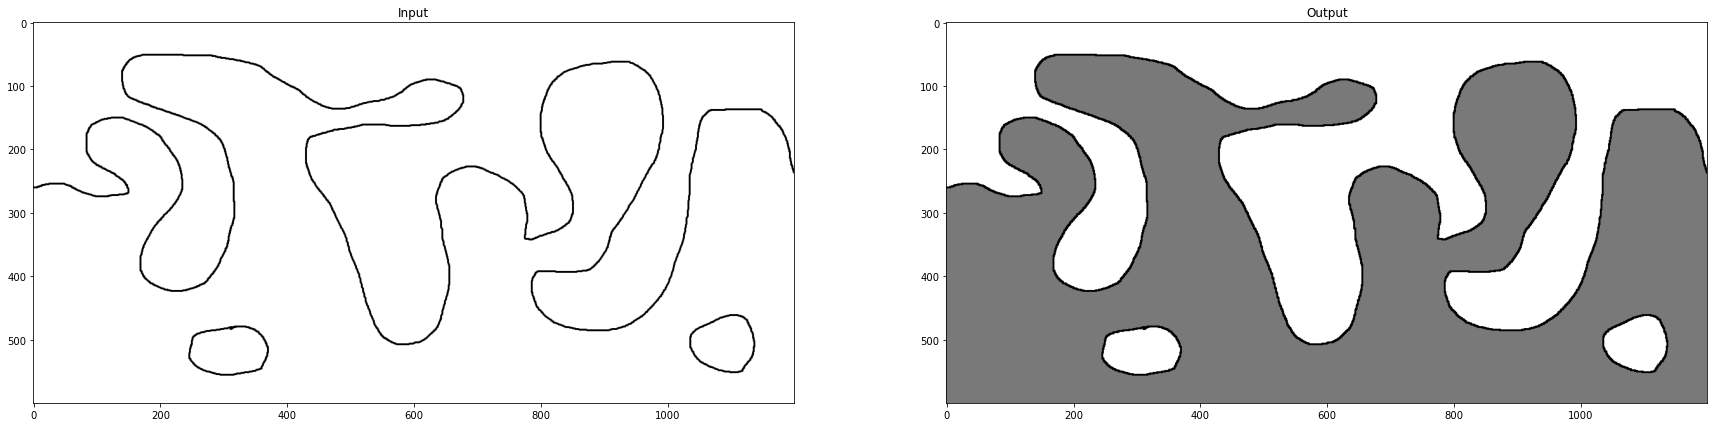

In [13]:
plot_result('../imgs/target/1.png')
# plot_result('./imgs/FS.bmp')
# plot_result('./imgs/345.bmp')
# plot_result('./imgs/123.bmp')
# plot_result('./imgs/4444.png')

In [14]:
img.save('1.png')